In [32]:
#CAPTCHA's Recognition 
#minor_project
#importing libraries
import numpy as np 

#to use as command line calls #using inline graphs will come next to code

import matplotlib.pyplot as plt #for graphs
import os #for operating system dependent fucntionality
from keras import layers #for building layers of neural net
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import cv2 #OpenCV(Open Source computer vision lib), containg CV algos
import string

In [33]:
#print images in dataset
print(os.listdir(r"C:\Users\hp\FinalProject\dataset\samples"))

['226md.png', '22d5n.png', '2356g.png', '23mdg.png', '23n88.png', '243mm.png', '244e2.png', '245y5.png', '24f6w.png', '24pew.png', '25257.png', '253dc.png', '25egp.png', '25m6p.png', '25p2m.png', '25w53.png', '264m5.png', '268g2.png', '28348.png', '28x47.png', '2b827.png', '2bg48.png', '2cegf.png', '2cg58.png', '2cgyx.png', '2en7g.png', '2enf4.png', '2fxgd.png', '2g783.png', '2g7nm.png', '2gyb6.png', '2mg87.png', '2mpnn.png', '2n73f.png', '2nbc5.jpg', '2nbcx.png', '2nf26.png', '2npg6.png', '2nx38.png', '2p2y8.png', '2pfpn.png', '2w4y7.png', '2wc38.png', '2wx73.png', '2x7bm.png', '2xc2n.png', '2ycn8.png', '2yggg.png', '325fb.png', '32cnn.png', '32dnn.png', '33b22.png', '33f7m.png', '33n73.png', '33ng4.png', '33p4e.png', '34b84.png', '34fxm.png', '34pcn.png', '368y5.png', '36bc2.png', '36nx4.png', '36w25.png', '373gb.png', '377xx.png', '378e5.png', '37d52.png', '37ep6.png', '387g2.png', '38n57.png', '3b4we.png', '3bd8f.png', '3bfnd.png', '3bnyf.png', '3bx86.png', '3c7de.jpg', '3cpwb.png'

In [34]:
#total no of images in dataset
n=len(os.listdir(r"C:\Users\hp\FinalProject\dataset\samples"))
print(n)

1070


In [35]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
print(nchar)


36


In [36]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir(r"C:\Users\hp\FinalProject\dataset\samples")):
  #i represents index no. of image in directory 
  #pic contains the file name of the particular image to be preprocessed at a time
    
    img = cv2.imread(os.path.join(r"C:\Users\hp\FinalProject\dataset\samples", pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    pic_target = pic[:-4]#this drops the .png extension from file name and contains only the captcha for training
    
    if len(pic_target) < 6: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

      target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y

In [37]:
#create model
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25
    
    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers
    
    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [38]:
#Create model
model=createmodel();
model.summary();

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 50, 200, 16)  160         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 25, 100, 16)  0          ['conv2d_3[0][0]']               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d_3[0][0]']  

In [39]:
X,y=preprocess()

In [40]:
#split the 1070 samples where 970 samples will be used for training purpose
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [41]:
#Applying the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=60, validation_split=0.2)
#batch size- 32 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

Epoch 1/60
25/25 [==============================] - 6s 179ms/step - loss: 17.9103 - dense_11_loss: 3.4407 - dense_13_loss: 3.6932 - dense_15_loss: 3.5767 - dense_17_loss: 3.6709 - dense_19_loss: 3.5289 - dense_11_accuracy: 0.0670 - dense_13_accuracy: 0.0799 - dense_15_accuracy: 0.0631 - dense_17_accuracy: 0.0515 - dense_19_accuracy: 0.0683 - val_loss: 17.7022 - val_dense_11_loss: 3.5855 - val_dense_13_loss: 3.5468 - val_dense_15_loss: 3.5179 - val_dense_17_loss: 3.5306 - val_dense_19_loss: 3.5214 - val_dense_11_accuracy: 0.0000e+00 - val_dense_13_accuracy: 0.0515 - val_dense_15_accuracy: 0.0464 - val_dense_17_accuracy: 0.0979 - val_dense_19_accuracy: 0.1392
Epoch 2/60
25/25 [==============================] - 4s 162ms/step - loss: 16.5763 - dense_11_loss: 3.1291 - dense_13_loss: 3.3744 - dense_15_loss: 3.3259 - dense_17_loss: 3.4615 - dense_19_loss: 3.2855 - dense_11_accuracy: 0.0902 - dense_13_accuracy: 0.0941 - dense_15_accuracy: 0.0747 - dense_17_accuracy: 0.0773 - dense_19_accuracy:

25/25 [==============================] - 5s 185ms/step - loss: 5.7700 - dense_11_loss: 0.4044 - dense_13_loss: 1.1009 - dense_15_loss: 1.1622 - dense_17_loss: 1.8223 - dense_19_loss: 1.2802 - dense_11_accuracy: 0.8582 - dense_13_accuracy: 0.6353 - dense_15_accuracy: 0.5915 - dense_17_accuracy: 0.3956 - dense_19_accuracy: 0.5438 - val_loss: 13.2723 - val_dense_11_loss: 4.8304 - val_dense_13_loss: 1.8362 - val_dense_15_loss: 2.0517 - val_dense_17_loss: 2.4407 - val_dense_19_loss: 2.1133 - val_dense_11_accuracy: 0.0000e+00 - val_dense_13_accuracy: 0.7784 - val_dense_15_accuracy: 0.6392 - val_dense_17_accuracy: 0.5052 - val_dense_19_accuracy: 0.6856
Epoch 14/60
25/25 [==============================] - 4s 172ms/step - loss: 5.2941 - dense_11_loss: 0.3897 - dense_13_loss: 1.0101 - dense_15_loss: 1.0820 - dense_17_loss: 1.6666 - dense_19_loss: 1.1457 - dense_11_accuracy: 0.8466 - dense_13_accuracy: 0.6327 - dense_15_accuracy: 0.6147 - dense_17_accuracy: 0.3827 - dense_19_accuracy: 0.5735 - va

25/25 [==============================] - 5s 182ms/step - loss: 2.9626 - dense_11_loss: 0.2103 - dense_13_loss: 0.4607 - dense_15_loss: 0.6330 - dense_17_loss: 1.0137 - dense_19_loss: 0.6449 - dense_11_accuracy: 0.9265 - dense_13_accuracy: 0.8273 - dense_15_accuracy: 0.7732 - dense_17_accuracy: 0.6289 - dense_19_accuracy: 0.7564 - val_loss: 12.5832 - val_dense_11_loss: 9.4020 - val_dense_13_loss: 0.8512 - val_dense_15_loss: 0.7904 - val_dense_17_loss: 0.8696 - val_dense_19_loss: 0.6700 - val_dense_11_accuracy: 0.1134 - val_dense_13_accuracy: 0.8608 - val_dense_15_accuracy: 0.8093 - val_dense_17_accuracy: 0.7887 - val_dense_19_accuracy: 0.8041
Epoch 26/60
25/25 [==============================] - 4s 168ms/step - loss: 2.8907 - dense_11_loss: 0.2182 - dense_13_loss: 0.4225 - dense_15_loss: 0.6210 - dense_17_loss: 0.9972 - dense_19_loss: 0.6318 - dense_11_accuracy: 0.9124 - dense_13_accuracy: 0.8570 - dense_15_accuracy: 0.7809 - dense_17_accuracy: 0.6314 - dense_19_accuracy: 0.7680 - val_lo

25/25 [==============================] - 4s 169ms/step - loss: 2.1233 - dense_11_loss: 0.1497 - dense_13_loss: 0.3128 - dense_15_loss: 0.4735 - dense_17_loss: 0.7340 - dense_19_loss: 0.4533 - dense_11_accuracy: 0.9472 - dense_13_accuracy: 0.8763 - dense_15_accuracy: 0.8106 - dense_17_accuracy: 0.7242 - dense_19_accuracy: 0.8338 - val_loss: 19.1813 - val_dense_11_loss: 15.9308 - val_dense_13_loss: 1.0466 - val_dense_15_loss: 0.7157 - val_dense_17_loss: 0.9114 - val_dense_19_loss: 0.5769 - val_dense_11_accuracy: 0.1804 - val_dense_13_accuracy: 0.8557 - val_dense_15_accuracy: 0.8608 - val_dense_17_accuracy: 0.7784 - val_dense_19_accuracy: 0.8247
Epoch 38/60
25/25 [==============================] - 4s 170ms/step - loss: 1.9653 - dense_11_loss: 0.1153 - dense_13_loss: 0.2929 - dense_15_loss: 0.4084 - dense_17_loss: 0.6675 - dense_19_loss: 0.4812 - dense_11_accuracy: 0.9549 - dense_13_accuracy: 0.8879 - dense_15_accuracy: 0.8389 - dense_17_accuracy: 0.7539 - dense_19_accuracy: 0.8067 - val_l

25/25 [==============================] - 4s 159ms/step - loss: 1.6458 - dense_11_loss: 0.1177 - dense_13_loss: 0.2402 - dense_15_loss: 0.3634 - dense_17_loss: 0.5811 - dense_19_loss: 0.3434 - dense_11_accuracy: 0.9588 - dense_13_accuracy: 0.9149 - dense_15_accuracy: 0.8582 - dense_17_accuracy: 0.7680 - dense_19_accuracy: 0.8724 - val_loss: 20.9815 - val_dense_11_loss: 17.3713 - val_dense_13_loss: 1.2373 - val_dense_15_loss: 0.9654 - val_dense_17_loss: 0.7830 - val_dense_19_loss: 0.6245 - val_dense_11_accuracy: 0.2165 - val_dense_13_accuracy: 0.8608 - val_dense_15_accuracy: 0.8144 - val_dense_17_accuracy: 0.8144 - val_dense_19_accuracy: 0.8505
Epoch 50/60
25/25 [==============================] - 4s 167ms/step - loss: 1.6592 - dense_11_loss: 0.0951 - dense_13_loss: 0.2479 - dense_15_loss: 0.3943 - dense_17_loss: 0.5514 - dense_19_loss: 0.3706 - dense_11_accuracy: 0.9639 - dense_13_accuracy: 0.8969 - dense_15_accuracy: 0.8557 - dense_17_accuracy: 0.7771 - dense_19_accuracy: 0.8557 - val_l

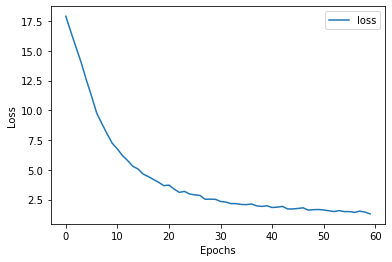

In [42]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

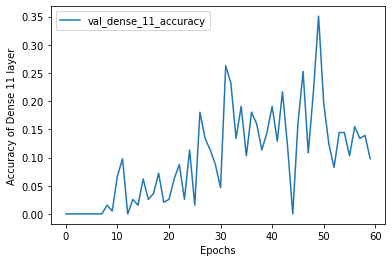

In [43]:
#graph of accuracy of dense_11 vs epochs
for label in ["val_dense_11_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 11 layer")
plt.show()

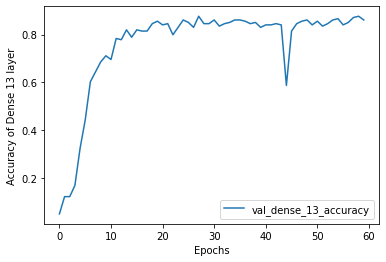

In [44]:
#graph of accuracy of dense_13 vs epochs
for label in ["val_dense_13_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 13 layer")
plt.show()

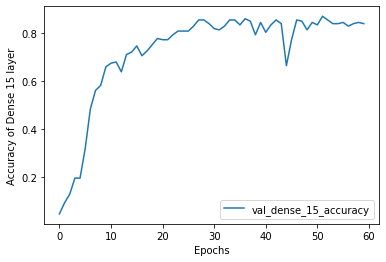

In [45]:
#graph of accuracy of dense_15 vs epochs
for label in ["val_dense_15_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 15 layer")
plt.show()

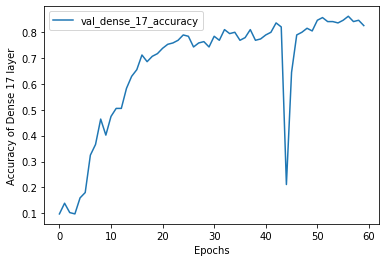

In [46]:
#graph of accuracy of dense_17 vs epochs
for label in ["val_dense_17_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 17 layer")
plt.show()

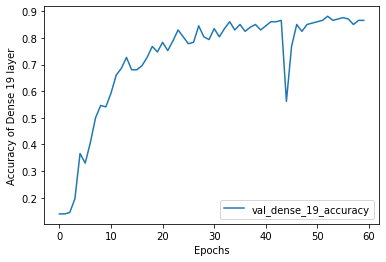

In [47]:
#graph of accuracy of dense_19 vs epochs
for label in ["val_dense_19_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 19 layer")
plt.show()

In [48]:
#Loss on training set
#Finding Loss on training set
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]])
print ("Loss on training set= " + str(preds[0]))

31/31 [==============================] - 1s 33ms/step - loss: 3.9518 - dense_11_loss: 3.2560 - dense_13_loss: 0.2412 - dense_15_loss: 0.1612 - dense_17_loss: 0.2021 - dense_19_loss: 0.0913 - dense_11_accuracy: 0.8196 - dense_13_accuracy: 0.9722 - dense_15_accuracy: 0.9680 - dense_17_accuracy: 0.9639 - dense_19_accuracy: 0.9722   
Loss on training set= 3.9517855644226074


In [49]:
#Finding loss on test set
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print ("Loss on testing set= " + str(preds[0]))

4/4 [==============================] - 0s 31ms/step - loss: 25.0303 - dense_11_loss: 23.2046 - dense_13_loss: 0.1476 - dense_15_loss: 0.4999 - dense_17_loss: 0.7770 - dense_19_loss: 0.4012 - dense_11_accuracy: 0.0000e+00 - dense_13_accuracy: 0.9800 - dense_15_accuracy: 0.9000 - dense_17_accuracy: 0.8500 - dense_19_accuracy: 0.9000
Loss on testing set= 25.030317306518555


In [50]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36 
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

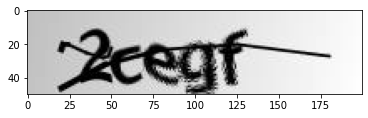

In [51]:
#Check model on samples
img=cv2.imread(r'C:\Users\hp\FinalProject\dataset\2cegf.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [52]:
print("Predicted Captcha =",predict(r'C:\Users\hp\FinalProject\dataset\2cegf.png'))

Predicted Captcha = 2cedf


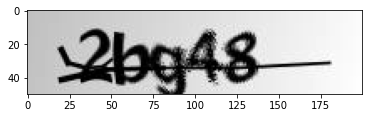

In [53]:
#Sample 2
img=cv2.imread(r'C:\Users\hp\FinalProject\dataset\2bg48.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [54]:
print("Predicted Captcha =",predict(r'C:\Users\hp\FinalProject\dataset\2bg48.png'))

Predicted Captcha = 2bg48


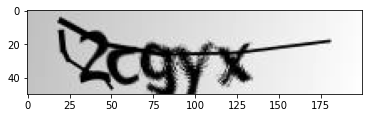

In [55]:
#Sample 2
img=cv2.imread(r'C:\Users\hp\FinalProject\dataset\2cgyx.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [56]:
print("Predicted Captcha =",predict(r'C:\Users\hp\FinalProject\dataset\2cgyx.png'))

Predicted Captcha = 2cgyx
